## Data preparation, basic statistics and visualization

Data mining, assignment, 2021-03-21  
**Ardit Nela**

An inevitable part of every project in the field of data mining is searching for,
editing and preparing data. In this task, you will get acquainted with a dataset and use procedures for converting data into the appropriate format and do
overview and display of basic statistics.

### Requirements

I used the following libraries:
- numpy
- matplotlib
- pandas
- datetime
- collections
- csv

### Data

In the task you will review and prepare Hollywood movie ratings from
the [MovieLens](https://grouplens.org/datasets/movielens/) collection from the period **1995-2016**.

The same data is used in all assignments, so you should get to know the data well. This is a database for
evaluating recommendations systems that include viewers and their ratings on a scale of 1 to 5.
In addition to the basic user and rating matrix, it includes also movie information (e.g., genre, date, tags, players).

The dataset is in folder `./podatki/ml-latest-small`. The database contains the following files:

* ratings.csv: user data and ratings,
* movies.csv: movie genre information,
* cast.csv: player information,
* tags.csv: tag information (\emph{tags}),
* links.csv: links to related databases.

Before starting to solve the task, take a good look at the data and read the **README.txt** file. You can learn about the details on the [website](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Prepare methods for loading data into the appropriate data structures. They will come in handy
also for further tasks.
Pay attention to the size of the data.

Write down the code to read the files and prepare the appropriate matrices (and other structures) of the data that you will use to answer the questions below.

You can split the code into multiple cells.

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
from csv import DictReader
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime

### Questions

The main purpose of data mining is *knowledge discovery from data*,
i.e., answering questions using computational approaches.

By using the principles you have learned on the exercises and lectures, answer
the questions below. For each question, think carefully about the way you will
best give, show or justify the answer. The essential part is the answers to
questions rather than the implemention of your solution.

#### Question 1 (15%):
Which movies are the best on average? Prepare a list of
movies and their average ratings and print 10 movies from the top of the list.
Do you see any problems with such an assessment? How could you solve it? What are they?
results of that?

You can split the code into multiple cells.

In [2]:
ratingsRaw = pd.read_csv('podatki/ml-latest-small/ratings.csv')
moviesRaw = pd.read_csv('podatki/ml-latest-small/movies.csv')
moviesRaw = moviesRaw.drop(["genres"], axis=1)

ratingsRaw.head(15)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [3]:
moviesRaw.head(15)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


I decided to use the pandas library to load the data. At first I wanted to check the means of the movie ratings based off of the raw data.

In [4]:
ratingsByMovie = ratingsRaw.groupby("movieId")["rating"].mean()
topMovies = []
for movieId in list(ratingsByMovie[ratingsByMovie == 5].index):
    topMovies.append(moviesRaw[moviesRaw["movieId"] == movieId]["title"].to_string(index=False))
print(len(topMovies))

315


As we can see using the raw data isn't optimal. Out of those 315 movies with a 5 star rating we haven't filtered out the movies with a small number of reviews. In order to improve our rankings we must use some formula in order to normalize the data (based on the number of reviews). I decided to use the algorithm that IMDB uses. It works as follows:

$ w = \frac{r_{num}}{r_{num} + r_{avg}} * s + \frac{r_{avg}}{r_{num} + r_{avg}} * \hat{s}$ <br> <br>
$w$ = weighted score <br>
$r_{num}$ = number of ratings for current movie <br>
$r_{avg}$ = mean number of ratings across all movies <br>
$S$ = raw average score of current movie <br>
$\hat{S}$ = average score across all movies <br>

In [5]:
# function for normalizing data
avgAllMovies = ratingsRaw["rating"].mean()
def weighRating(avg, numRatings):
    return (numRatings / (numRatings + 11)) * avg + (11 / (numRatings + 11)) * avgAllMovies

# iterate through data and normalize
ratingsWeighted = dict()
for movie in set(ratingsRaw["movieId"]):
    avg = ratingsRaw[ratingsRaw["movieId"] == movie]["rating"].mean()
    numRatings = ratingsRaw[ratingsRaw["movieId"] == movie]["rating"].count()
    ratingsWeighted[movie] = weighRating(avg, numRatings)  

In [6]:
sortedWeightedRatings = dict(sorted(ratingsWeighted.items(), key=lambda item: item[1]))

topMovies = []
for movieId in list(sortedWeightedRatings)[-10:]:
    topMovies.append((moviesRaw[moviesRaw["movieId"] == movieId]["title"].to_string(index=False),
                     str(round(sortedWeightedRatings[movieId], 2))))

topMovies.reverse()
for movie, score in topMovies:
    print("Movie: " + movie + "; Score: " + score)

Movie:  Shawshank Redemption, The (1994); Score: 4.45
Movie:  Godfather, The (1972); Score: 4.44
Movie:  Usual Suspects, The (1995); Score: 4.33
Movie:  Godfather: Part II, The (1974); Score: 4.32
Movie:  Schindler's List (1993); Score: 4.27
Movie:  African Queen, The (1951); Score: 4.26
Movie:  Maltese Falcon, The (1941); Score: 4.26
Movie:  Chinatown (1974); Score: 4.24
Movie:  All About Eve (1950); Score: 4.23
Movie:  Rear Window (1954); Score: 4.23


Answer: **write down the answer and explain it**

#### Question 2 (15%):
Each film belongs to one or more genres.
How many genres are there? Show the distribution of genres using appropriate
visualization.

You can split the code into multiple cells.

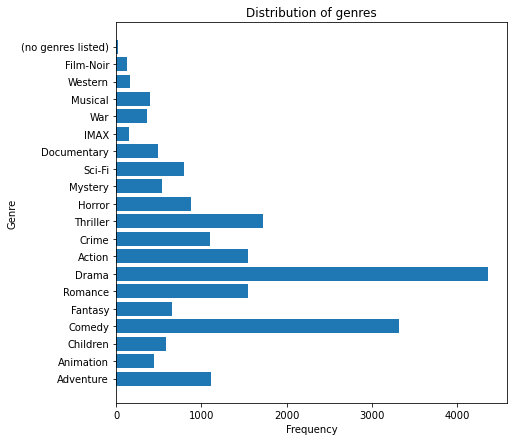

In [7]:
reader = DictReader(open('podatki/ml-latest-small/movies.csv', 'rt', encoding='utf-8'))

genresAll = []
for row in reader:
    genresAll.extend([genre for genre in row["genres"].split("|")])

genreDict = dict(Counter(genresAll))
x = list(genreDict.keys())
y = list(genreDict.values())

plt.figure(figsize=(7, 7)) #width, height
plt.title('Distribution of genres')
plt.ylabel('Genre')
plt.xlabel('Frequency')
plt.barh(x, y)
plt.show()

There are 19 movie genres listed (some movies don't have listen genres, however).

Answer: **write down the answer and explain it**

#### Question 3 (20%):
The number of ratings is different for each film. But is there a relationship between the number of ratings and the average movie rating? Describe the procedure that you used to answer the question.

You can split the code into multiple cells.

In [8]:
tempAvgRatings = []
tempAvgNum = []
for movie in set(ratingsRaw["movieId"]):
    numRatings = ratingsRaw[ratingsRaw["movieId"] == movie]["rating"].count()
    tempAvgNum.append(numRatings)
    tempAvgRatings.append(ratingsRaw[ratingsRaw["movieId"] == movie]["rating"].mean())

corrDataFrame = pd.DataFrame()
corrDataFrame["rating"] = tempAvgRatings
corrDataFrame["ratingNum"] = tempAvgNum
print(corrDataFrame.corr())

             rating  ratingNum
rating     1.000000   0.130827
ratingNum  0.130827   1.000000


I used the built-in Pearson's function. I grouped the data by movieID and looked at the relationship between the number of ratings and the rating itself. According to my calculations, the correlation isn't significat. So I decided to filter the data by removing movies with less than 50 total ratings.

In [9]:
print(corrDataFrame[corrDataFrame["ratingNum"] >= 50].corr())

             rating  ratingNum
rating     1.000000   0.313796
ratingNum  0.313796   1.000000


As we can see this improves our correlation because we removed the movies with a low amount of ratings (movies with high scores and a low number of ratings weighed down the data).

Answer: **write down the answer and explain it**

#### Question 4 (30%):
Each rating was entered on a specific date (column
*timestamp*). Does the popularity of individual films change over time?
Solve the problem by allocating ratings for a given film by time and at any time
point calculate the average for the last 30, 50, or 100 ratings. Draw a graph, how 
the rating changes and show it for two interesting examples of movies.

You can split the code into multiple cells.

My initial step was to convert the timestamp data from a number to a datetime object.

In [10]:
times = []
reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]
    ts = datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M')
    time = datetime.strptime(ts, '%Y-%m-%d %H:%M')
    times.append(time)
ratingsRaw["date"] = times

Afterwards, I wrote a function that takes in a specific date, movie ID, and a parameter that represents the number of ratings we want to be taken into account when calculating the mean score of the movie for that particular time.

In [11]:
def ratingsOverTime(date, movieId, numberOfRatings):
    newData = ratingsRaw[ratingsRaw["movieId"] == movieId].sort_values(by=["date"])
    filteredData = newData[newData["date"] <= date]
    
    # if length is smaller calculate for length
    if numberOfRatings > filteredData.shape[0]:
        numberOfRatings = filteredData.shape[0]
    
    filteredData = filteredData[-numberOfRatings:]
    ratingsList = filteredData["rating"].to_string(index=False).split("\n")
    ratingsList = [float(el) for el in ratingsList]
    return (np.mean(ratingsList))

I created a function that demonstrates the change of ratings within a give timeframe and saves the values in a dictionary.

In [12]:
def demonstrate(movieId, numOfRatings):
    demoDict = dict()
    dates = sorted(ratingsRaw[ratingsRaw["movieId"] == movieId]["date"])
    for date in dates:
        demoDict[date.strftime("%Y-%m")] = ratingsOverTime(date, movieId, numOfRatings)
    return demoDict

Lastly, I defined a function for plotting the demonstration

In [13]:
def plotDemo(demoDict, title):
    plt.figure(figsize=(10, 2), dpi=150)
    x = list(demoDict.keys())
    y = list(demoDict.values())
    plt.ylim(0, 5.1)
    plt.xticks([ticks for ticks in range(0, len(x), int(len(x) / 9))])
    plt.yticks([ticks / 2 for ticks in range(0, 11)])
    plt.title(title)
    plt.plot(x, y)

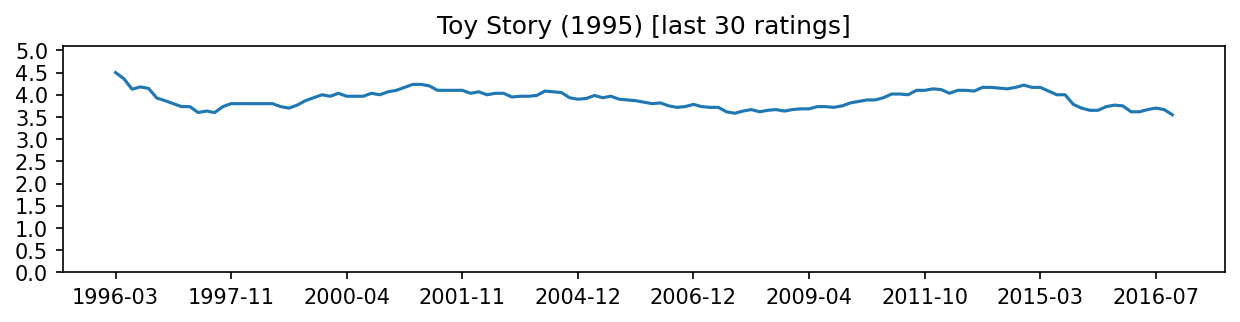

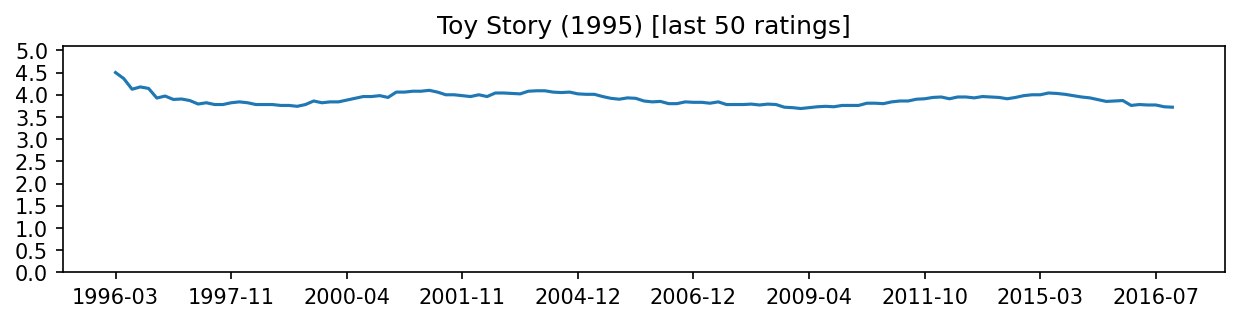

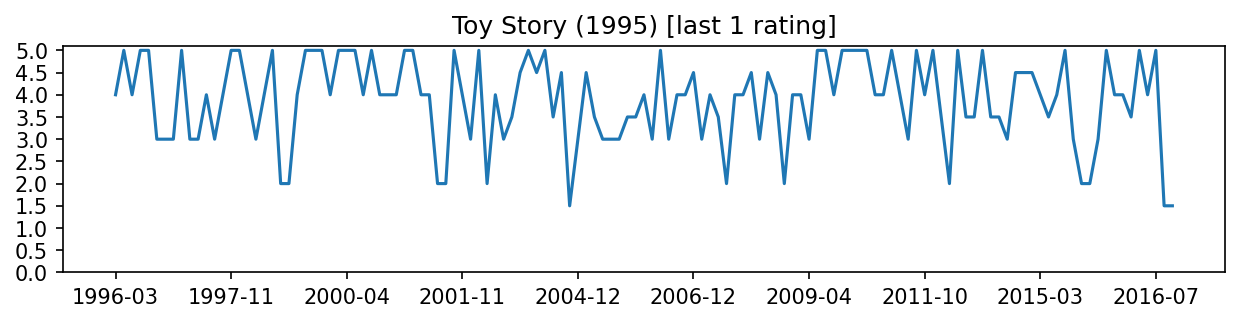

In [14]:
plotDemo(demonstrate(1, 30), "Toy Story (1995) [last 30 ratings]")
plotDemo(demonstrate(1, 50), "Toy Story (1995) [last 50 ratings]")
plotDemo(demonstrate(1, 1), "Toy Story (1995) [last 1 rating]")

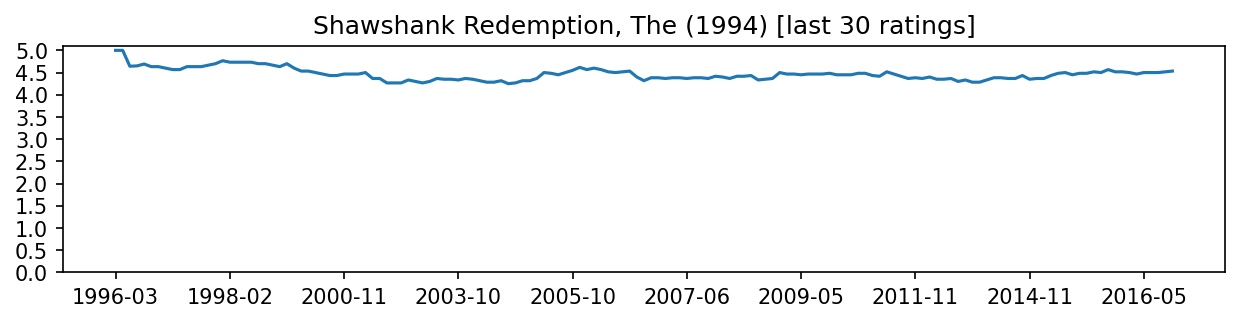

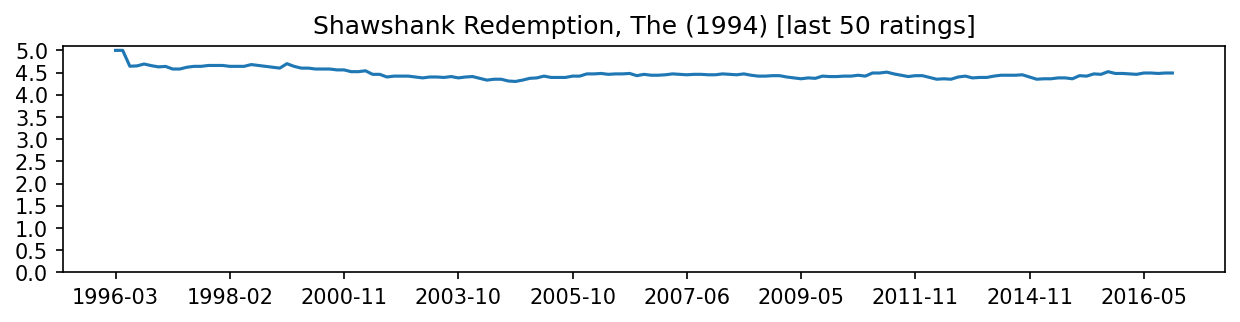

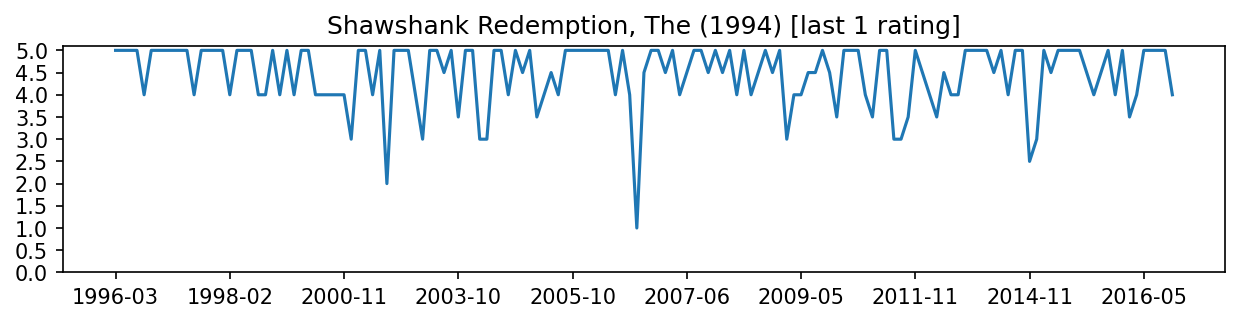

In [15]:
plotDemo(demonstrate(318, 30), "Shawshank Redemption, The (1994) [last 30 ratings]")
plotDemo(demonstrate(318, 50), "Shawshank Redemption, The (1994) [last 50 ratings]")
plotDemo(demonstrate(318, 1), "Shawshank Redemption, The (1994) [last 1 rating]")

Answer: **write down the answer and explain it**

#### Question 5 (20%):
How would you rate the popularity of individual actors? Describe the procedure
 for evaluating and print the 10 most popular actors.

You can split the code into multiple cells.

I started by creating a dictionary where I store actors and the movies they played in.

In [16]:
actors = dict()
reader = DictReader(open('podatki/ml-latest-small/cast.csv', 'rt', encoding='utf-8'))
for row in reader:
    for actor in row["cast"].split("|"):
        if actor not in actors:
            actors[actor] = []
        actors[actor].append(int(row["movieId"]))

I decided that summing all the weighted ratings of the movies that the actors play in would be a good measuer of popularity (another way would be to look at the sheer number of movies acted in). I also made sure that we have a rating for the movies listed for a particular actor (if we don't, then we just discard the movie).

In [17]:
actorsPopularity = dict.fromkeys(actors.keys(), 0)
for actor in actors:
    num = 0
    for ID in actors[actor]:
        if ID in ratingsWeighted: num += ratingsWeighted[ID]
    actorsPopularity[actor] += num

In [18]:
sortedActorsPopularity = sorted(actorsPopularity.items(), key=lambda x: -x[1])
for actorName, actorScore in sortedActorsPopularity[:11]:
    if actorName: print("Actor: " + actorName + "; Score: " + str(round(actorScore, 2)))

Actor: Robert De Niro; Score: 233.96
Actor: Michael Caine; Score: 196.09
Actor: Bruce Willis; Score: 192.07
Actor: Morgan Freeman; Score: 188.44
Actor: Christopher Walken; Score: 175.91
Actor: Nicolas Cage; Score: 171.26
Actor: Richard Jenkins; Score: 170.49
Actor: Steve Buscemi; Score: 169.99
Actor: John Goodman; Score: 164.82
Actor: Bill Murray; Score: 164.41


Answer: **write down the answer and explain it**

#### Bonus question (5%):

What's your favorite movie? Why?

Answer: **write down the answer and explain it**

My favorite movie is Spirited Away (2001), a fantasy Japanese animated movie about a girl that gets stuck in a world of spirits. I love everything about it, from the scene building to the soundtrack. It does an amazing job of keeping you immersed in the story and the world (even in moments of silence) and making you empathetic towards the characters. Aside from all that, it reminds me of my childhood and I watch it often to relax.

### Notes
You can use the built-in `csv` module to load data.

In [19]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Data in the last line of the file:

In [20]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Convert the time format (*Unix time*). Code about the structure is listed in documentation of the module  [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [21]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'